# Timestamp Check

In [38]:
import os
import json
import re
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import random

In [43]:
folder_count = len(os.listdir("./Images"))

Going to show images from 25 to 29


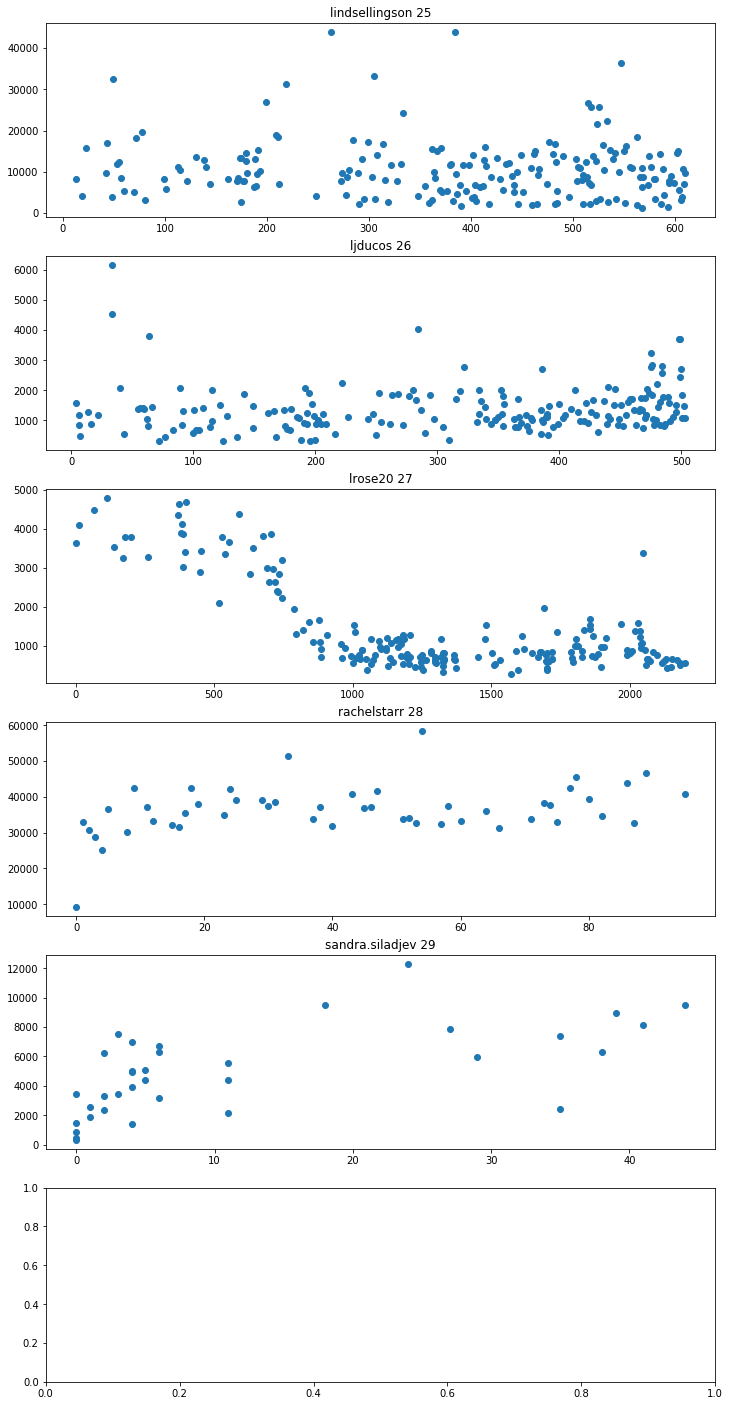

In [123]:
index_stop = random.randint(6,folder_count-1)
images_num_to_show = 5
print(f"Going to show images from {index_stop-images_num_to_show} to {index_stop-1}")
fig, axs = plt.subplots(index_count+1)
fig.subplots_adjust(hspace=0.2)
fig.set_figheight(25)
fig.set_figwidth(12)
index_count = 0
for index,folder_name in enumerate(os.listdir("./Images")):
    file = open(f"./Images/{folder_name}/{folder_name}.json",encoding="utf8")
    data = json.load(file)
    images = []
    likes = []
    days_count = []
    pattern = re.compile(r'\d+_\d+_\d+_n.jpg')
    for item in data["GraphImages"]:
        finds = re.search(pattern,item["display_url"])
        images.append(finds[0])
        likes.append(item["edge_media_preview_like"]["count"])
        date_post = datetime.fromtimestamp(item["taken_at_timestamp"])
        days_count.append((datetime.today() - date_post).days)
    maxLikes = max(likes)
    if index < index_stop and index >= (index_stop - images_num_to_show):
        axs[index_count].scatter(days_count,likes)
        axs[index_count].set_title(f"{folder_name} {index}")
        index_count += 1
    if index_count == images_num_to_show:
        break